In [2]:

import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from textblob import TextBlob  # Simple sentiment analysis tool

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sujal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:

# -------- Load and Combine Datasets -------- #
print("\nLoading datasets...")
df1 = pd.read_csv("tweets/data_analysis.csv", low_memory=False)
df2 = pd.read_csv("tweets/data_science.csv", low_memory=False)
df3 = pd.read_csv("tweets/data_visualization.csv", low_memory=False)

df = pd.concat([df1, df2, df3], ignore_index=True)
print("✅ Datasets loaded and combined. Total rows:", df.shape[0])



Loading datasets...
✅ Datasets loaded and combined. Total rows: 314092


In [4]:
# -------- Inspect Columns -------- #
print("\nAvailable columns:", df.columns.tolist())

# Rename 'tweet' to 'text' if available
if 'tweet' in df.columns:
    df.rename(columns={'tweet': 'text'}, inplace=True)
    print("✅ Renamed 'tweet' column to 'text'.")



Available columns: ['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone', 'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video', 'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest']
✅ Renamed 'tweet' column to 'text'.


In [5]:
# -------- Assign Sentiment Labels -------- #
print("\nAssigning sentiment using TextBlob...")
df['sentiment'] = df['text'].apply(lambda x: 'positive' if TextBlob(str(x)).sentiment.polarity > 0 else 'negative')
print("✅ Sentiment assigned based on polarity.")

# Show sample rows
print("\nSample labeled data:")
print(df[['text', 'sentiment']].head(5))



Assigning sentiment using TextBlob...
✅ Sentiment assigned based on polarity.

Sample labeled data:
                                                text sentiment
0  Join @SPJ_IC at 6 p.m. EDT Tuesday for the nex...  negative
1  READ: Resilience, hard work, and perseverance ...  negative
2  How will the shift to streaming impact movie-m...  positive
3  (2/2) to gain the aptitude to find better solu...  positive
4  Alexander Lukashenko is still in power in Bela...  negative


In [7]:
# -------- Clean and Filter Data -------- #
print("\nCleaning text...")
df = df[['text', 'sentiment']].dropna()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)
print("✅ Text cleaned.")

# Show cleaned sample
print("\nSample cleaned text:")
print(df[['clean_text']].head(5))



Cleaning text...
✅ Text cleaned.

Sample cleaned text:
                                          clean_text
0  join pm edt tuesday next ictalk created code b...
1  read resilience hard work perseverance paid ge...
2  shift streaming impact moviemaking interesting...
3  gain aptitude find better solutions realworld ...
4  alexander lukashenko still power belarus despi...


In [8]:
# -------- Encode Labels and Split -------- #
print("\nEncoding sentiment labels...")
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})
print("✅ Labels encoded: 1 for Positive, 0 for Negative")

print("\nSentiment label distribution:")
print(df['label'].value_counts())

print("\nSplitting data into train and test sets (80/20)...")
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, random_state=42
)
print(f"✅ Training samples: {len(X_train)}, Testing samples: {len(X_test)}")



Encoding sentiment labels...
✅ Labels encoded: 1 for Positive, 0 for Negative

Sentiment label distribution:
label
0    164938
1    149154
Name: count, dtype: int64

Splitting data into train and test sets (80/20)...
✅ Training samples: 251273, Testing samples: 62819


In [9]:
# -------- Vectorization -------- #
print("\nVectorizing text...")
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
print("✅ Text vectorized. Feature count:", X_train_vec.shape[1])



Vectorizing text...
✅ Text vectorized. Feature count: 120074


In [10]:
# -------- Train Model -------- #
print("\nTraining Logistic Regression model...")
model = LogisticRegression()
model.fit(X_train_vec, y_train)
print("✅ Model training complete.")



Training Logistic Regression model...
✅ Model training complete.


c:\Users\sujal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# -------- Evaluate Model -------- #
print("\nPredicting on test data...")
y_pred = model.predict(X_test_vec)

print("\n--- Model Evaluation ---")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Predicting on test data...

--- Model Evaluation ---
Accuracy Score: 0.9444753975707987

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     33050
           1       0.96      0.92      0.94     29769

    accuracy                           0.94     62819
   macro avg       0.95      0.94      0.94     62819
weighted avg       0.95      0.94      0.94     62819




Generating confusion matrix...
Confusion Matrix:
 [[31941  1109]
 [ 2379 27390]]


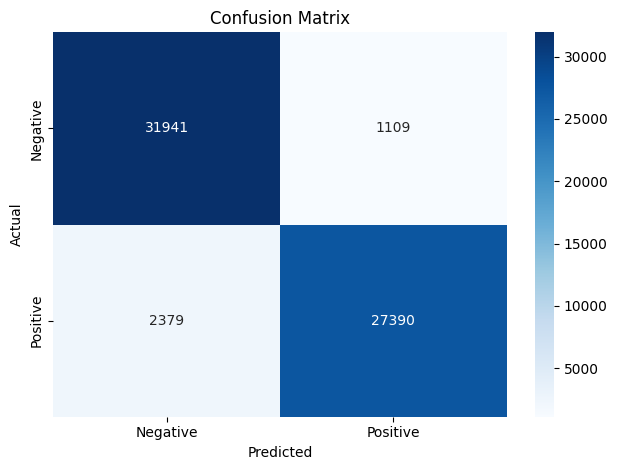

✅ Done. Confusion matrix saved as 'confusion_matrix.png'


In [13]:
# -------- Confusion Matrix -------- #
print("\nGenerating confusion matrix...")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()

print("✅ Done. Confusion matrix saved as 'confusion_matrix.png'")
